# <center>Data Mining Project Code</center>

** **
## <center>*Temporal Data Segmentation*</center>

** **

In this notebook, we will implement different clustering methods in order to analyse and group customers by temporal-related features.

** **
The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# ToC

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Clustering](#2.-Clustering) <br>

    2.1 [Hierarchical Clustering](#2.1-Hierarchical-Clustering) <br><br>
    2.2 [K-Means](#2.2-K-Means) <br><br>
    2.3 [Self-Organizing Maps (SOM)](#2.3-Self-Organizing-Maps-(SOM)) <br><br>
    2.4 [Density-based Clustering](#2.4-Density-based-Clustering) <br>
    
    &emsp; 2.4.1 [Meanshift](#2.4.1-Meanshift)<br><br>
    &emsp; 2.4.2 [DBScan](#2.4.2-Density-Based-Spatial-Clustering-of-Applications-with-Noise-(DBSCAN))<br><br>
    &emsp; 2.4.3 [HDBScan](#2.4.3-HDBScan)<br>
    
    2.5 [Gaussian Mixture Model (GMM)](#2.5-Gaussian-Mixture-Model-(GMM)) <br><br>
    2.6 [Self Organising Maps (SOM)](#2.6-Self-Organising-Maps-(SOM)) <br><br>
    
3. [Model Combination](#3.-Model-Combination) <br>

    3.1 [SOM + K-Means](#3.1-SOM-+-K-Means) <br><br>

4. [Model Comparison](#4.-Model-Comparison)
 

# 1. Importing Libraries & Data

In [152]:
import pandas as pd
import numpy as np
from IPython.display import display 

# Scalers
from sklearn.preprocessing import RobustScaler, StandardScaler, \
                                  MinMaxScaler

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from hdbscan import HDBSCAN
from sklearn.mixture import GaussianMixture
from minisom import MiniSom
from sklearn.neighbors import NearestNeighbors
import umap.umap_ as umap

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

path = './plots/temporal_data/'

In [2]:
data = pd.read_csv('data/data.csv', 
                   index_col = "customer_id")
temp_data = data[s.temporal_data]

In [3]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
first_order,30850.0,28.671702,24.107845,0.0,8.0,22.0,45.0,89.0
last_order,30850.0,63.397763,23.204338,0.0,49.0,70.0,83.0,90.0
days_between,30850.0,34.726062,29.096796,0.0,3.0,33.0,61.0,90.0
HR_1,30850.0,0.050859,0.291049,0.0,0.0,0.0,0.0,8.0
HR_2,30850.0,0.058023,0.304809,0.0,0.0,0.0,0.0,8.0
HR_3,30850.0,0.113679,0.476228,0.0,0.0,0.0,0.0,11.0
HR_4,30850.0,0.096564,0.398518,0.0,0.0,0.0,0.0,8.0
HR_5,30850.0,0.077796,0.339004,0.0,0.0,0.0,0.0,5.0
HR_6,30850.0,0.065413,0.309341,0.0,0.0,0.0,0.0,8.0
HR_7,30850.0,0.069465,0.313822,0.0,0.0,0.0,0.0,8.0


# 2. Clustering

<a href="#top">Top &#129033;</a>

**Scale Data Before Clustering**

In [4]:
scaled_data = MinMaxScaler().fit_transform(temp_data)

In [5]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns=temp_data.columns, 
                           index=temp_data.index)

## 2.1 Hierarchical Clustering

To develop a clustering solution using hierarchical clustering, the following steps were carried out:

**1. Creating Dendrograms for All Combinations**
- Dendrograms were generated for all combinations of linkage methods (e.g., single, complete, average, ward) and distance metrics (e.g., Euclidean, Manhattan).
- This step provided a visual representation of the clustering hierarchy to understand how clusters merge at different thresholds.
- The dendrograms were analysed to identify configurations that produced distinct and meaningful clusters.

**2. Selecting the Best Combinations**
- Based on the dendrograms, the most promising combinations of linkage methods and distance metrics were shortlisted.
- The selection was based on:
  - Clear separation of clusters (visible gaps in the dendrograms).
  - Avoidance of configurations that produced excessive chaining effects or imbalanced clusters.
- This step narrowed the scope to the most viable configurations.

**3. Evaluating the Shortlisted Combinations**
- The shortlisted configurations were quantitatively evaluated using the following metrics:
  - **R² Score**: Measures how well the clustering structure explains the variance in the data. Higher values indicate a better-defined cluster structure.
  - **Silhouette Score**: Evaluates the compactness and separation of clusters. Scores range from -1 (poor clustering) to 1 (ideal clustering), providing insights into cluster quality.
  - **Calinski-Harabasz Score**: Assesses the ratio of the sum of cluster dispersion to inter-cluster distances. Higher values indicate well-separated and compact clusters.
- By leveraging these metrics, the combination of linkage methods and distance metrics producing the highest-quality clusters was identified and selected.

<a href="#top">Top &#129033;</a>

In [7]:
linkages = ["complete", "average", "single", "ward"]

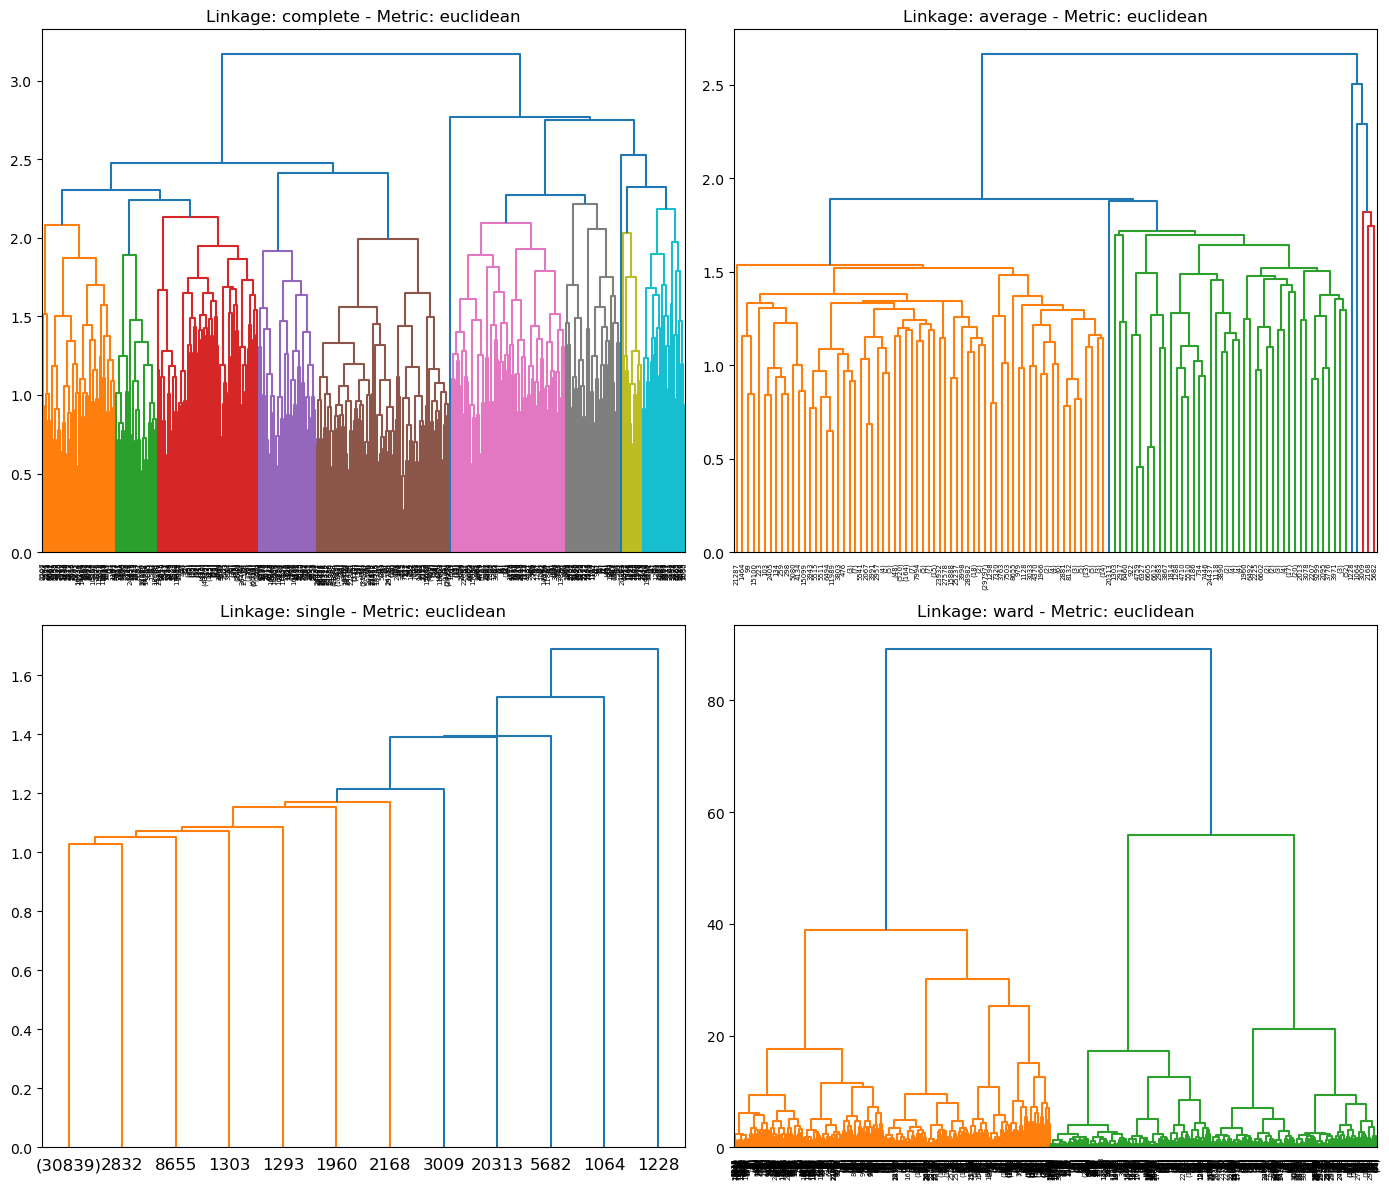

In [8]:
f.plot_hierarchical_dendrograms(scaled_data, 
                                path=path+'euclidean', 
                                linkages=linkages, 
                                metrics=['euclidean'])

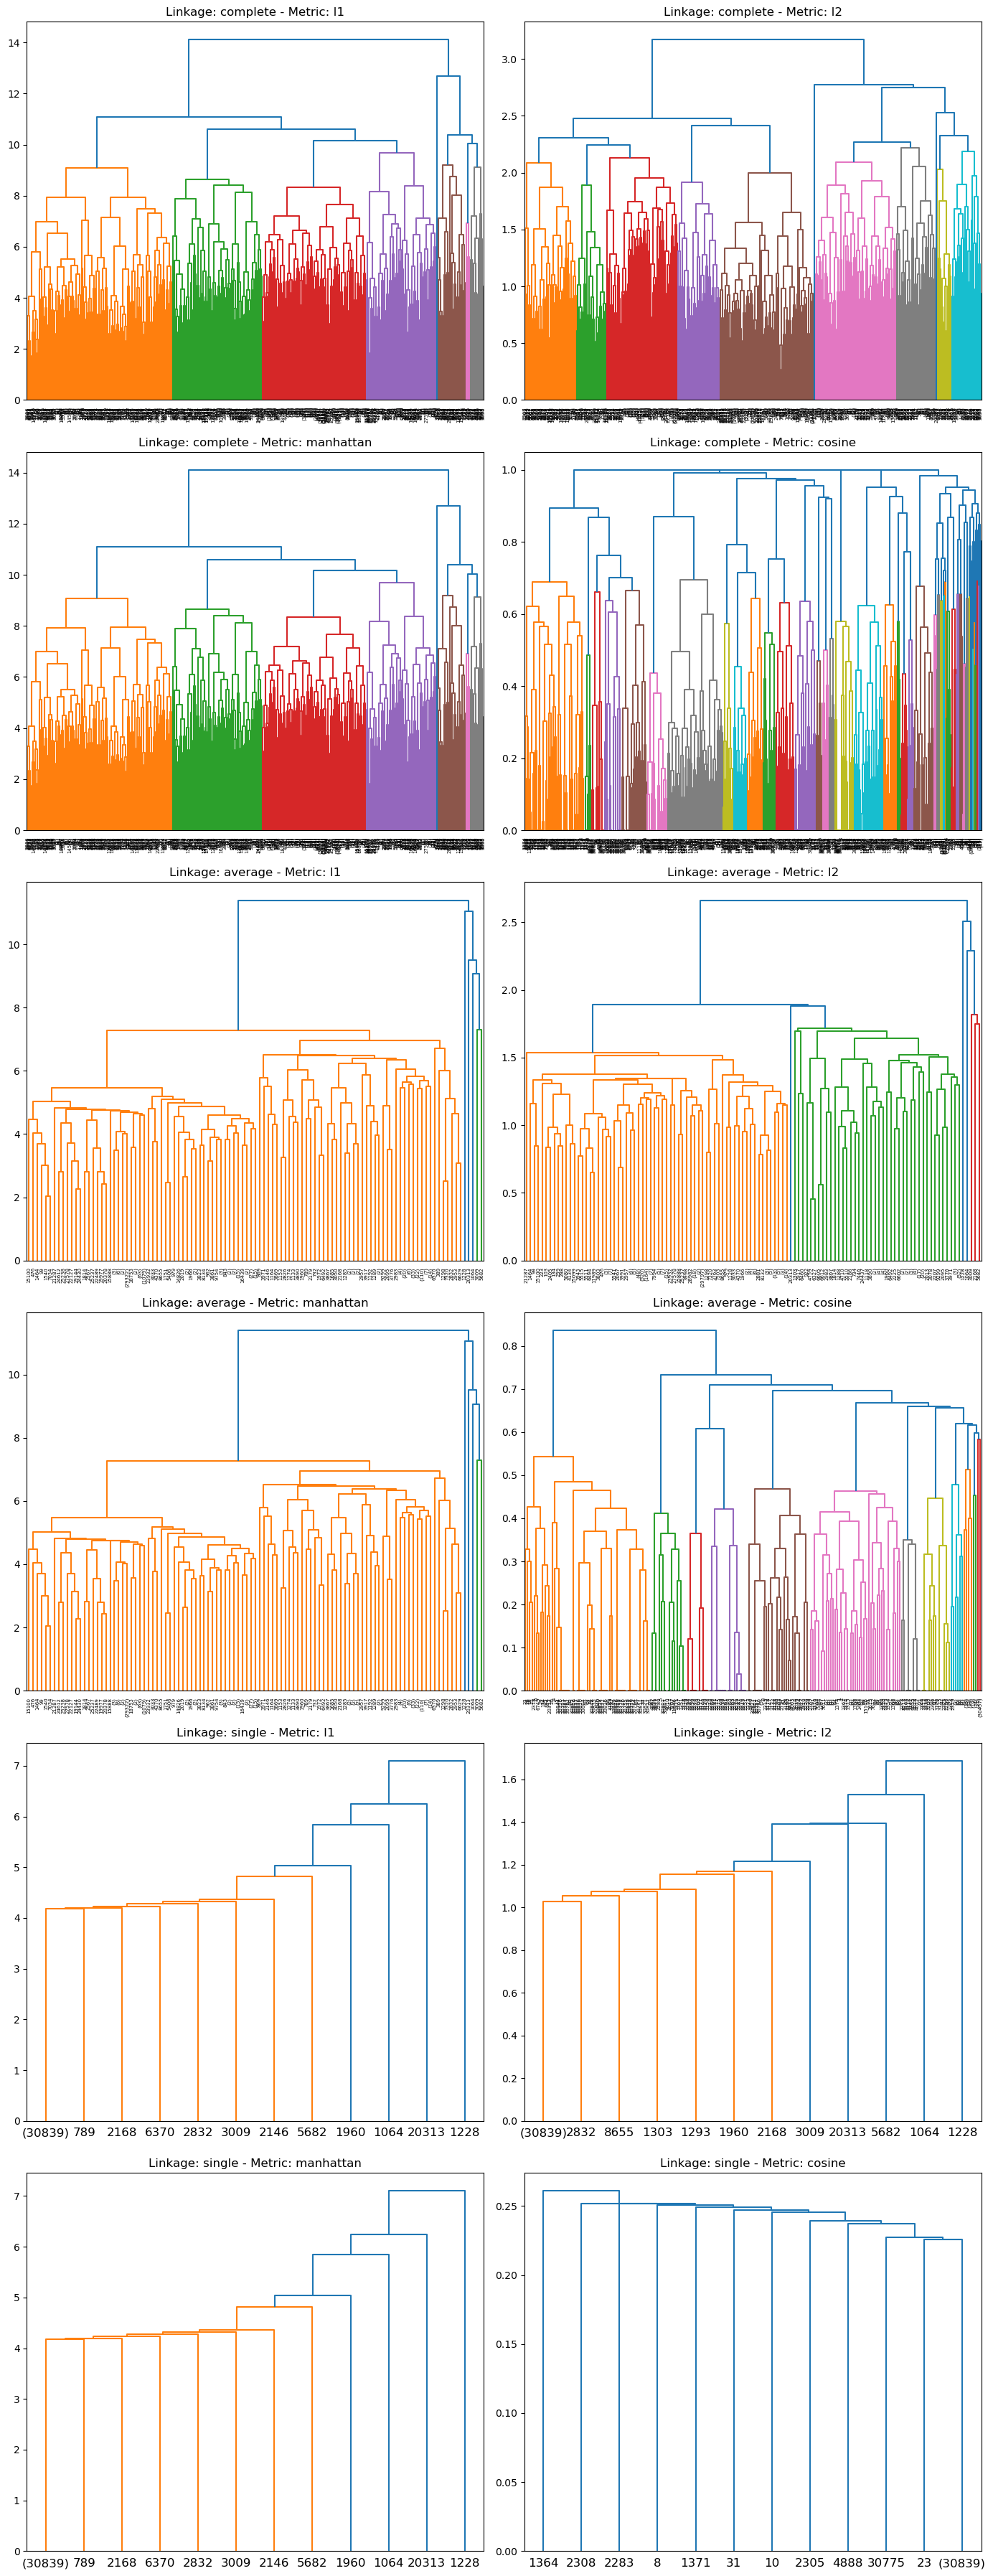

In [9]:
f.plot_hierarchical_dendrograms(scaled_data, 
                                path=path+'others', 
                                linkages=linkages[:3], 
                                metrics=['l1', 'l2', 'manhattan',
                                         'cosine'])

In [10]:
hr_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 10)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l2'}
    for k in range(2, 6)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 7)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'manhattan'}
    for k in range(2, 5)
] 

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hr_results.append(result)

# Convert results to DataFrame
hr_results_df = pd.DataFrame(hr_results)
hr_results_df

,Model,n_clusters,linkage,metric,R2,Silhouette,Calinski-Harabasz
0,hierarchical,2,ward,euclidean,0.321427,0.288721,14612.121143
1,hierarchical,3,ward,euclidean,0.448215,0.271311,12528.512649
2,hierarchical,4,ward,euclidean,0.509345,0.248925,10673.657978
3,hierarchical,5,ward,euclidean,0.545943,0.188924,9271.742391
4,hierarchical,6,ward,euclidean,0.571992,0.178310,8244.023727
5,hierarchical,7,ward,euclidean,0.590155,0.133270,7402.055637
6,hierarchical,8,ward,euclidean,0.602719,0.135256,6684.389899
7,hierarchical,9,ward,euclidean,0.614801,0.111968,6153.019372
8,hierarchical,2,complete,l2,0.048721,0.452677,1579.926004
9,hierarchical,3,complete,l2,0.049129,0.451631,796.896922


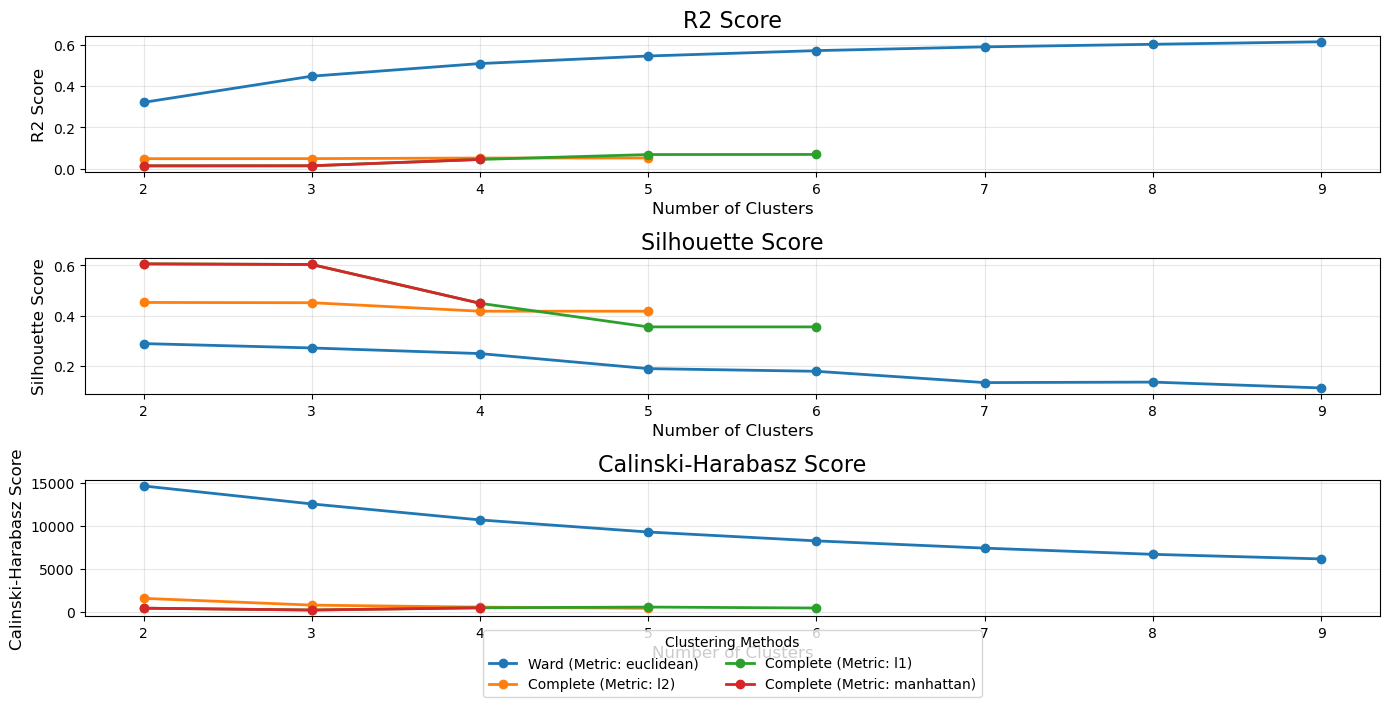

In [10]:
f.plot_evaluation_scores(hr_results_df, path+'hierarchical')

**Final Model for Hierarchical Clustering**

In [16]:
linkage = 'complete'
distance = 'manhattan'
n_clusters = 2

hclust = AgglomerativeClustering(linkage=linkage, 
                                 metric=distance, 
                                 n_clusters=n_clusters)

hc_labels = hclust.fit_predict(scaled_data)

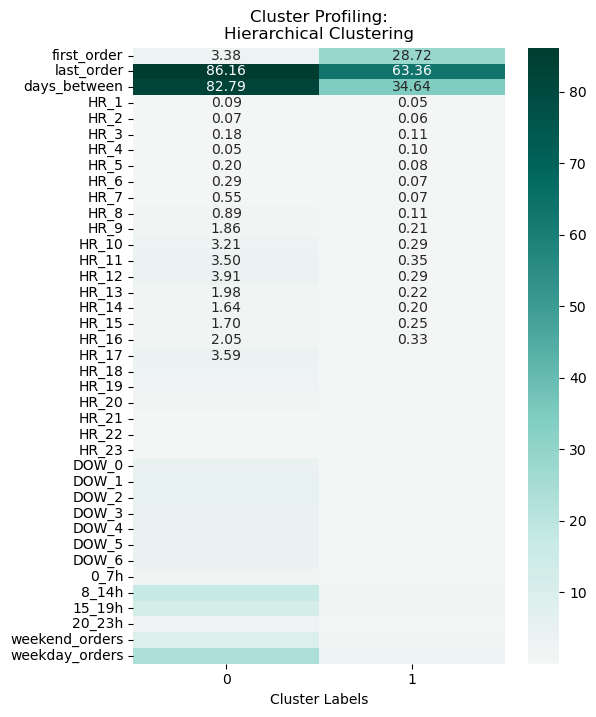

In [58]:
f.plot_cluster_profiling(temp_data, hc_labels, "Hierarchical")

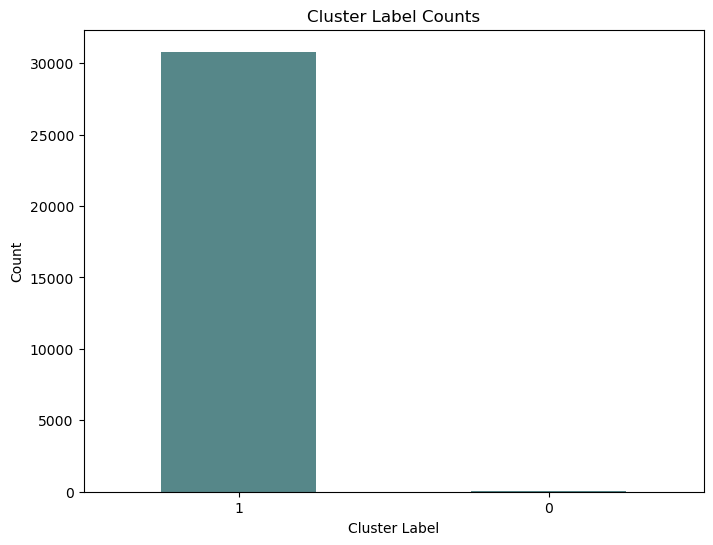

In [38]:
f.plot_counts(hc_labels)

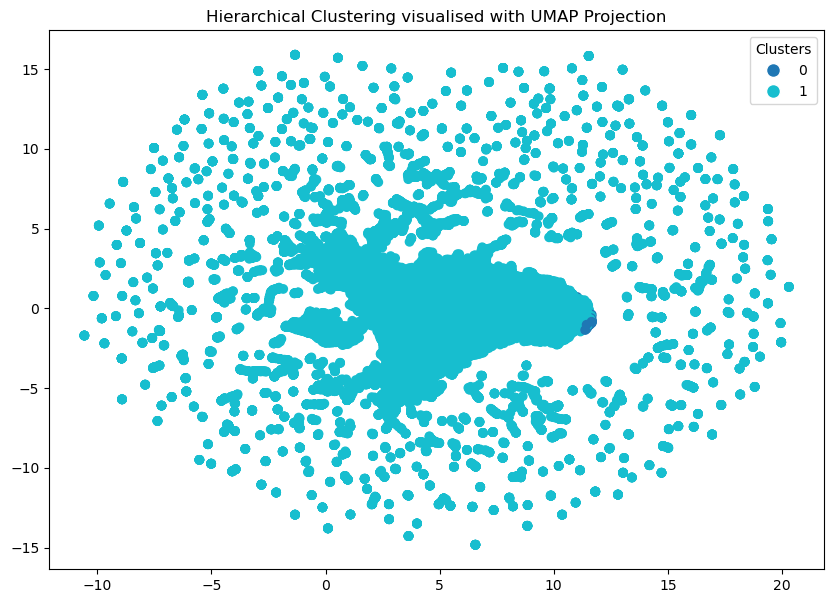

In [22]:
umap_object = umap.UMAP(n_neighbors = 5)

umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = hc_labels,
                   technique = 'Hierarchical Clustering visualised with UMAP')

## 2.2 K-Means

<a href="#top">Top &#129033;</a>

To develop an optimal clustering solution using the K-Means algorithm, the following steps were carried out:

1. **Using the Elbow Method to Determine a Range for `n_clusters`**
- We began by using the **Elbow Method** to determine an appropriate range of values for the `n_clusters` hyperparameter.
- By plotting the within-cluster sum of squared distances (inertia) for a range of values of `n_clusters`, we identified the "elbow point," where increasing the number of clusters resulted in diminishing improvements to the inertia.
- This step provided a good initial estimate for the potential number of clusters and helped guide further testing.

2. **Evaluating Different `n_clusters` Values**
- After identifying a range of `n_clusters`, we evaluated different values of `n_clusters` based on various clustering quality metrics:
  - **R² Score**
  - **Silhouette Score**
  - **Calinski-Harabasz Score**
- These metrics allowed us to compare the effectiveness of each value for `n_clusters`, providing quantitative insights into cluster quality.

3. **Selecting the Optimal `n_clusters`**
- After evaluating multiple values for `n_clusters` with the metrics, we selected the value that showed the best balance across all three performance measures.
- This value provided the most meaningful and stable clusters, indicating that the K-Means algorithm was able to separate the data in a way that maximized clustering quality.
  
By focusing primarily on tuning `n_clusters`, we ensured that our clustering solution was optimized and tailored to the specific dataset, ultimately delivering high-quality, interpretable clusters.

**Elbow Method**

The **Elbow Method** is a technique used to determine the optimal number of clusters (`n_clusters`) for K-Means clustering. It involves plotting the within-cluster sum of squared distances (inertia) against different values of `n_clusters`. As the number of clusters increases, the inertia decreases, but at a certain point, the rate of improvement slows down. 

The "elbow" is the point on the plot where the inertia starts to level off, indicating that adding more clusters does not lead to significant improvements in clustering quality. This point suggests the optimal number of clusters to use for the dataset, balancing between overfitting and underfitting the model.


In [18]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

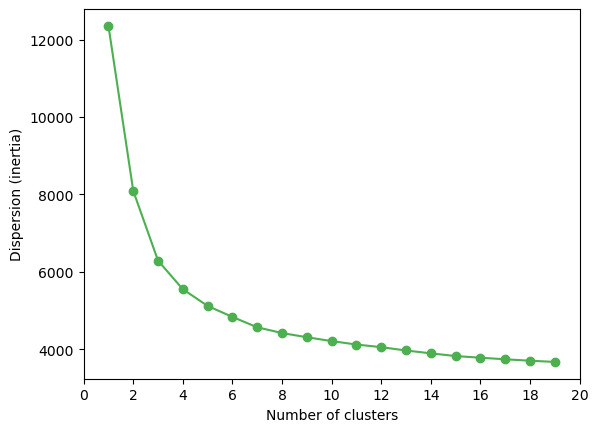

In [19]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
# plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [26]:
results_kmeans = []

# Define clustering settings
cluster_settings = [
    {"model_type": "kmeans", "n_clusters": k, 'random_state': 42} for k in range(2, 8)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    results_kmeans.append(result)

# Convert results to DataFrame
results_kmeans_df = pd.DataFrame(results_kmeans)
results_kmeans_df

,Model,n_clusters,random_state,R2,Silhouette,Calinski-Harabasz
0,kmeans,2,42,0.345026,0.314975,16250.025943
1,kmeans,3,42,0.490941,0.305716,14874.578103
2,kmeans,4,42,0.550739,0.294078,12604.482463
3,kmeans,5,42,0.585643,0.240275,10898.931231
4,kmeans,6,42,0.608654,0.223725,9594.237674
5,kmeans,7,42,0.630303,0.200268,8764.138327


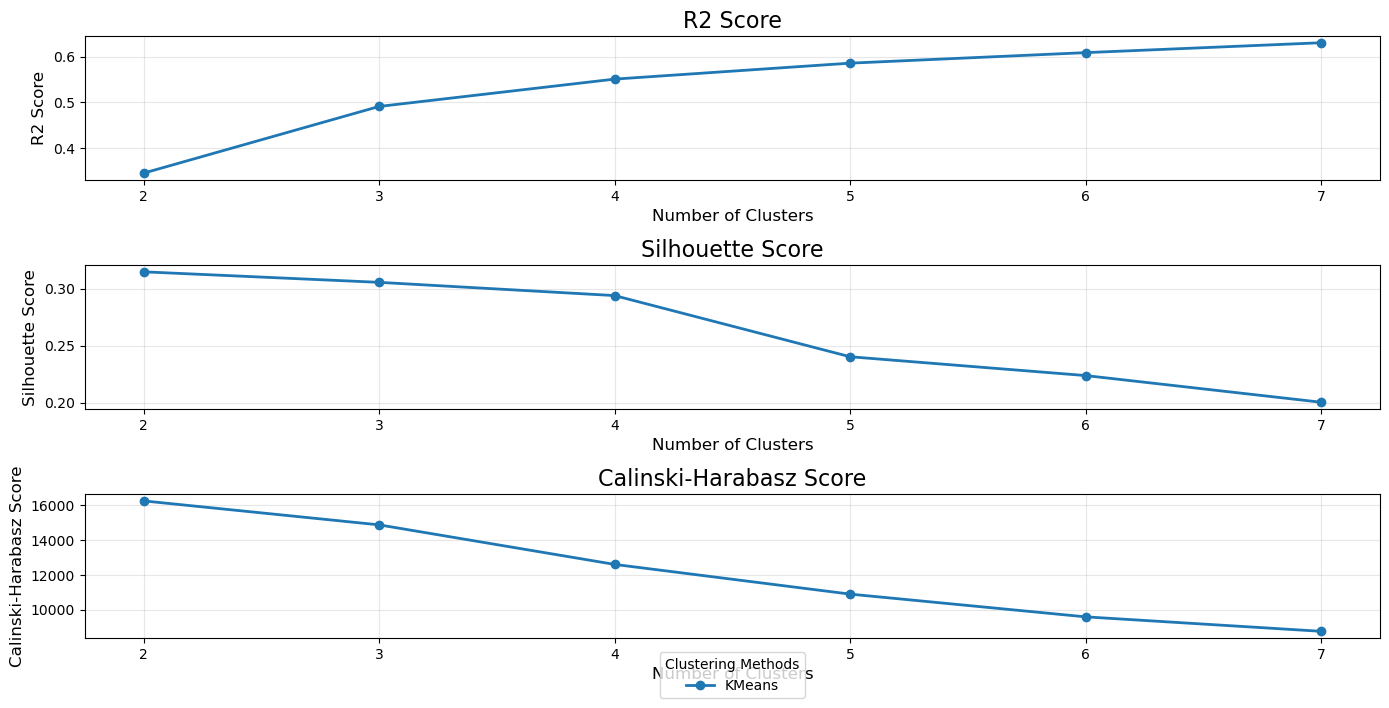

In [11]:
f.plot_evaluation_scores(results_kmeans_df, path+'kmeans')

**Final Solution for K-Means**

In [14]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, 
                 n_init=15, 
                 random_state=1)

km_labels = kmclust.fit_predict(scaled_data)

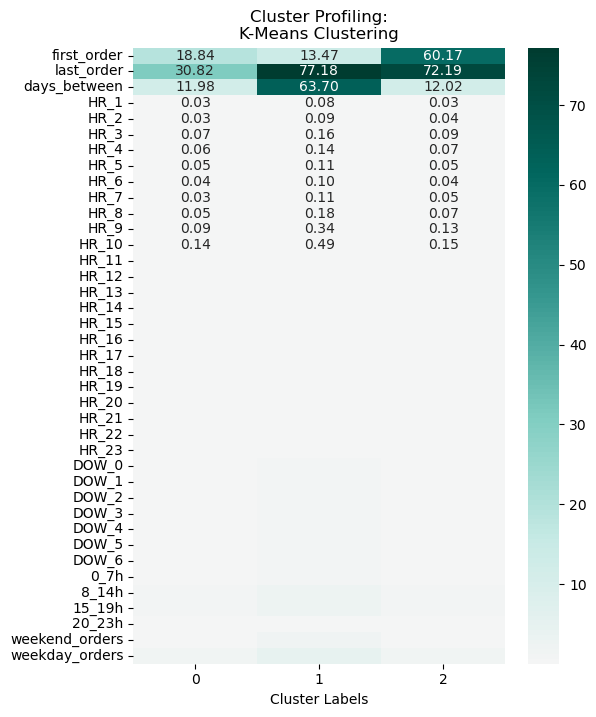

In [38]:
f.plot_cluster_profiling(temp_data, km_labels, "K-Means")

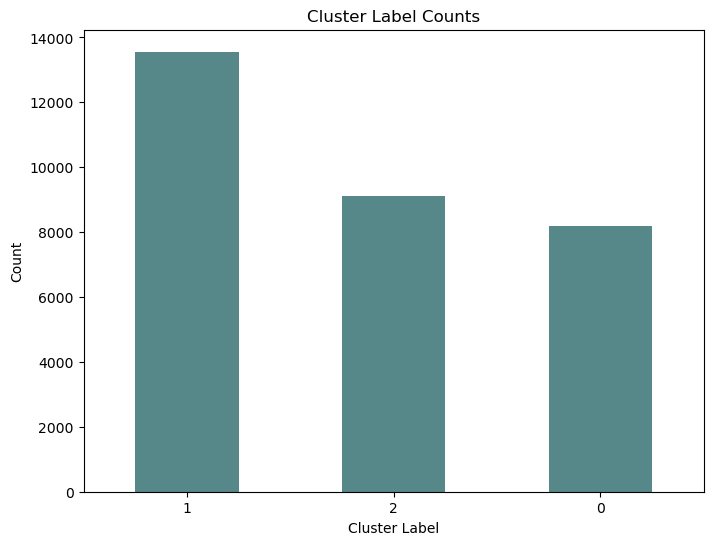

In [37]:
f.plot_counts(km_labels)

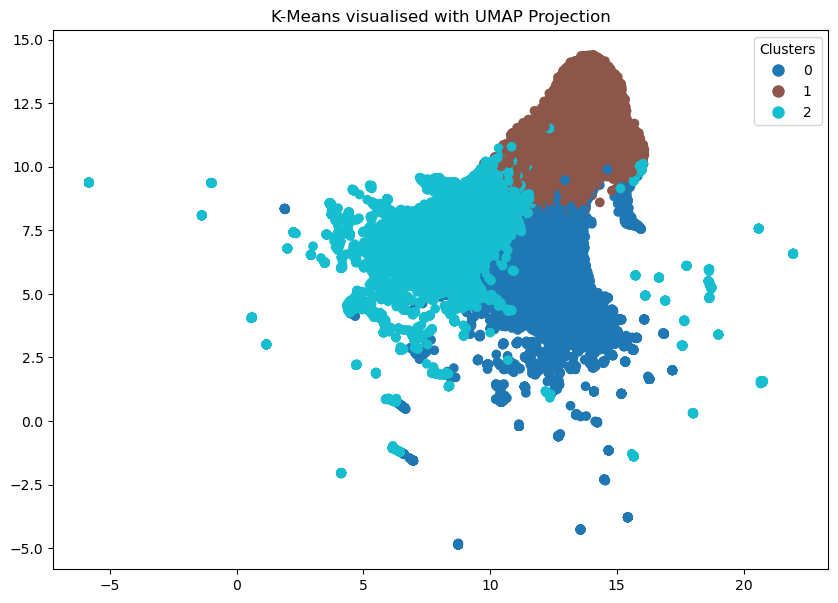

In [23]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = km_labels,
                   technique = 'K-Means visualised with UMAP')

## 2.4 Density-based Clustering

<a href="#top">Top &#129033;</a>

### 2.4.1 Meanshift

<a href="#top">Top &#129033;</a>

**Estimate Bandwidth**

In [12]:
bandwidth = estimate_bandwidth(scaled_data)
bandwidth

0.650878409161391

In [13]:
ms = MeanShift(bandwidth=bandwidth)
mslabels = ms.fit_predict(scaled_data)

KeyboardInterrupt: 

In [184]:
# ms_results = []

# # Define clustering settings
# cluster_settings = [
#     {"model_type": "meanshift", 'bandwidth': 0.650878409161391, 
#      'cluster_all': True, 'min_bin_freq': k}
#     for k in range(1, 5)  
# ] + [
#     {"model_type": "meanshift", 'bandwidth': 0.650878409161391, 
#      'cluster_all': False, 'min_bin_freq': k}
#     for k in range(1, 5)  
# ] 
# # Loop over settings and evaluate models
# for settings in cluster_settings:
#     result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
#     ms_results.append(result)

# # Convert results to DataFrame
# ms_results_df = pd.DataFrame(ms_results)
# ms_results_df

KeyboardInterrupt: 

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)

mslabels = ms.fit_predict(scaled_data)

In [ ]:
umap_object = umap.UMAP(n_neighbors = 5)

umap_embedding = umap_object.fit_transform(scaled_data)

ms_labels = kmclust.fit_predict(umap_embedding)

f.plot_dim_reduction(umap_embedding, targets = mslabels,
                   technique = 'K-Means visualised with UMAP')

### 2.4.2 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

<a href="#top">Top &#129033;</a>

To initialize the DBSCAN clustering algorithm, we first constructed a **K-Distance Graph** to determine an appropriate range for the `eps` hyperparameter. The elbow point in the graph provided a starting point for selecting potential values of `eps`.

With the range of `eps` values suggested by the plot, we tested several combinations of hyperparameters, including:  
- Different values for `eps`.  
- Different algorithm types (`'ball_tree'`, `'kd_tree'`, `'brute'`).  

The combinations were then evaluated using the same metrics previously explained:
- **R² Score**.  
- **Silhouette Score**.  
- **Calinski-Harabasz Score**.

At the end, we choose our best dbscan solution.


**Optimimising *Eps* Parameter**

To determine the optimal value for the `eps` parameter in **DBSCAN**, we started by constructing a **K-Distance Graph**. This approach helps visualize the distances to the k-th nearest neighbour for all points in the dataset and guides us in selecting an appropriate `eps` value. The **`eps` (epsilon)** parameter determines the maximum distance between two points to classify them as part of the same cluster in DBSCAN. 



The **K-Distance Graph** plots the sorted distances to each point’s k-th nearest neighbour. By observing the graph:

1. Look for the **elbow point** in the curve. 
   - This is the region where the distances transition from a gradual increase to a sharp rise. 
   - The elbow indicates the maximum distance within a cluster before reaching outliers.

2. Select an `eps` value slightly larger than the distance at the elbow.
   - This ensures all points within dense clusters are captured without including many outliers.


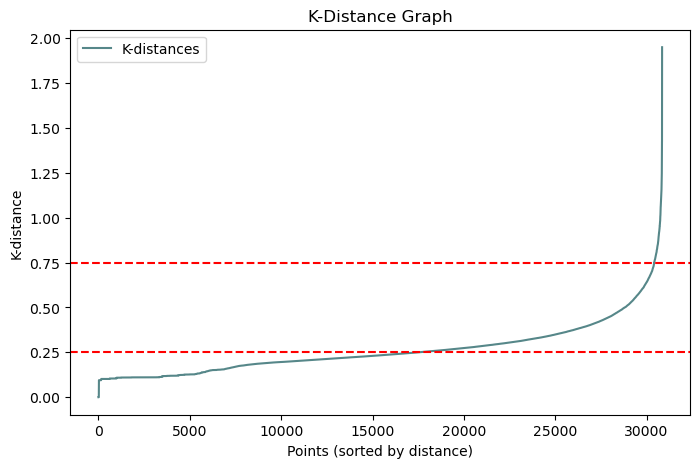

In [109]:
# K-distance graph to find the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(scaled_data)
distances, _ = neigh.kneighbors(scaled_data)
distances = np.sort(distances[:, -1])  

# Plot the distances
plt.figure(figsize=(8, 5))
plt.plot(distances, label="K-distances", color = "#568789")
plt.axhline(y=0.75, color='red', linestyle='--')
plt.axhline(y=0.25, color='red', linestyle='--')
plt.xlabel("Points (sorted by distance)")
plt.ylabel("K-distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

In [110]:
db_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "dbscan", "eps": k, "algorithm": 'ball_tree'}
    for k in np.arange(0.25, 0.75, 0.1)  
] + [
    {"model_type": "dbscan", "eps": k, "algorithm": 'kd_tree'}
    for k in np.arange(0.25, 0.75, 0.1)
] + [
    {"model_type": "dbscan", "eps": k, "algorithm": 'brute'}
    for k in np.arange(0.25, 0.75, 0.1)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    db_results.append(result)

# Convert results to DataFrame
db_results_df = pd.DataFrame(db_results)
db_results_df

,Model,eps,algorithm,R2,Silhouette,Calinski-Harabasz
0,dbscan,0.25,ball_tree,0.185465,0.044521,3511.838335
1,dbscan,0.35,ball_tree,0.134189,0.202124,1593.569416
2,dbscan,0.45,ball_tree,0.095797,0.400408,3268.218407
3,dbscan,0.55,ball_tree,0.061312,0.455422,1007.419741
4,dbscan,0.65,ball_tree,0.039818,0.520891,1279.228756
5,dbscan,0.25,kd_tree,0.185465,0.044521,3511.838335
6,dbscan,0.35,kd_tree,0.134189,0.202124,1593.569416
7,dbscan,0.45,kd_tree,0.095797,0.400408,3268.218407
8,dbscan,0.55,kd_tree,0.061312,0.455422,1007.419741
9,dbscan,0.65,kd_tree,0.039818,0.520891,1279.228756


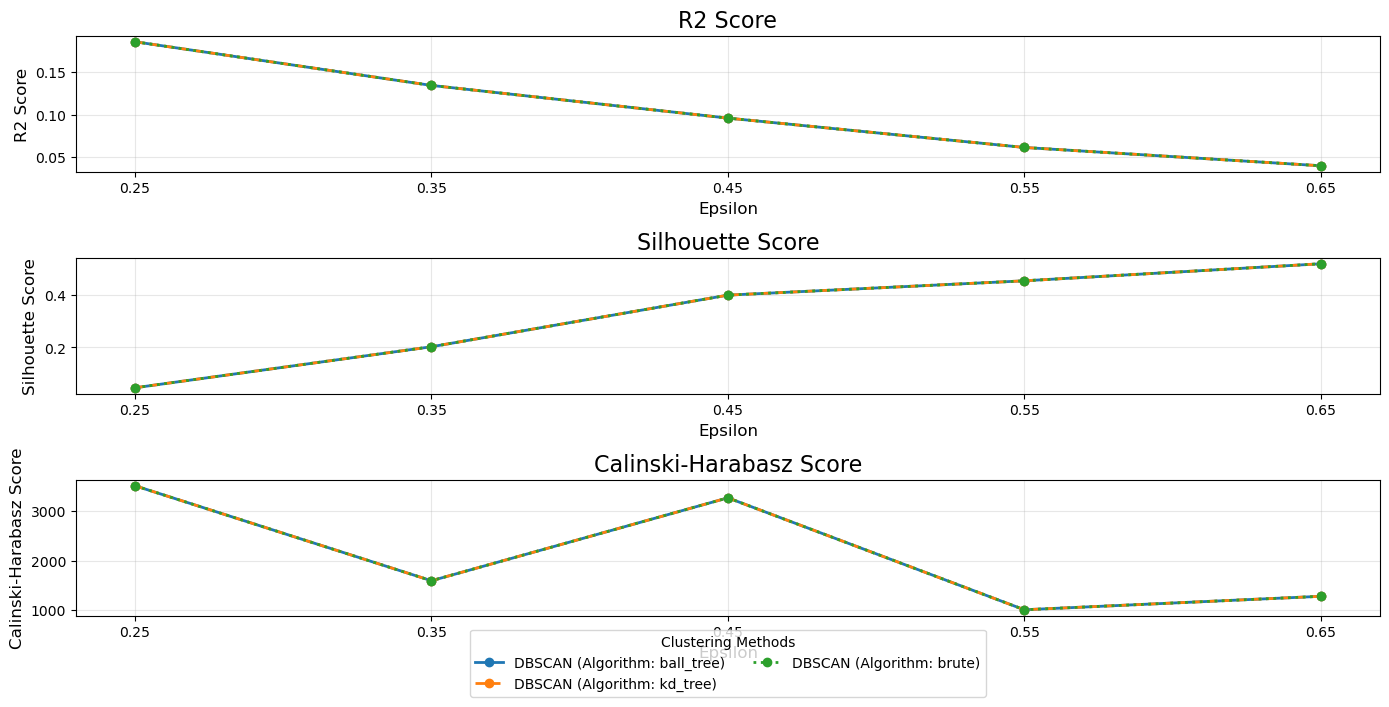

In [112]:
f.plot_evaluation_scores(db_results_df, path+'DBScan_scores')

**Final Model for DBScan**

In [142]:
dbscan = DBSCAN(eps = 0.45)  
dblabels = dbscan.fit_predict(scaled_data)

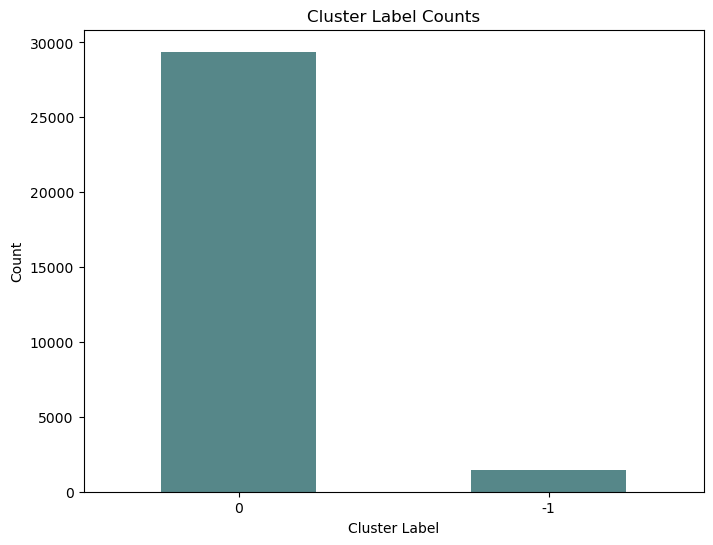

In [143]:
f.plot_counts(dblabels)

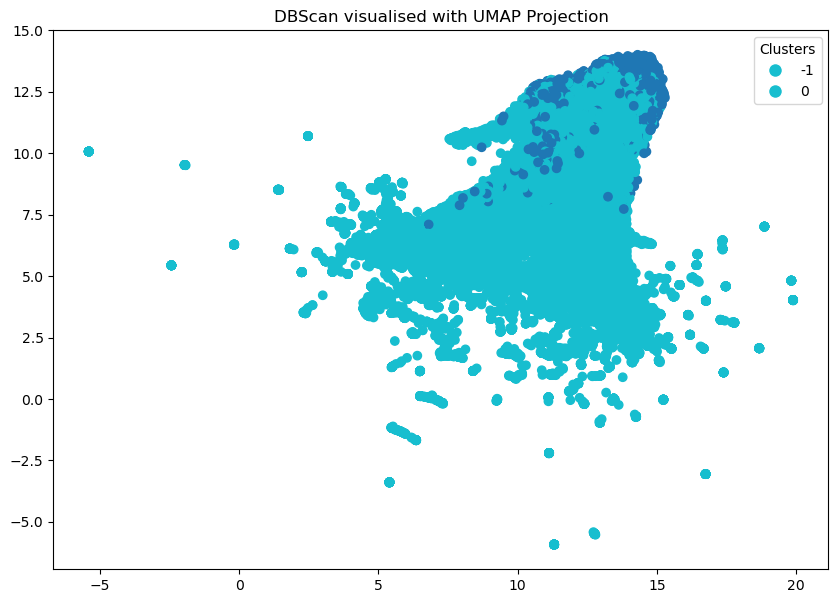

In [144]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = dblabels,
                   technique = 'DBScan visualised with UMAP')

### 2.4.3 HDBScan

<a href="#top">Top &#129033;</a>

In [122]:
hdb_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'leaf'}
    for k in range(5, 75, 10)  
] + [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'eom'}
    for k in range(5, 75, 10)  
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hdb_results.append(result)

# Convert results to DataFrame
hdb_results_df = pd.DataFrame(hdb_results)
hdb_results_df

,Model,min_cluster_size,cluster_selection_method,R2,Silhouette,Calinski-Harabasz
0,hdbscan,5,leaf,0.244977,-0.305895,14.036173
1,hdbscan,15,leaf,0.169993,-0.349937,43.368787
2,hdbscan,25,leaf,0.118025,-0.182258,73.583575
3,hdbscan,35,leaf,0.066997,-0.209308,73.767786
4,hdbscan,45,leaf,0.043922,-0.209653,118.053534
5,hdbscan,55,leaf,0.029121,-0.200888,132.157058
6,hdbscan,65,leaf,0.033607,-0.199826,178.764463
7,hdbscan,5,eom,0.251817,-0.319640,16.601292
8,hdbscan,15,eom,0.180494,-0.381652,72.837867
9,hdbscan,25,eom,0.216153,0.047414,2835.350648


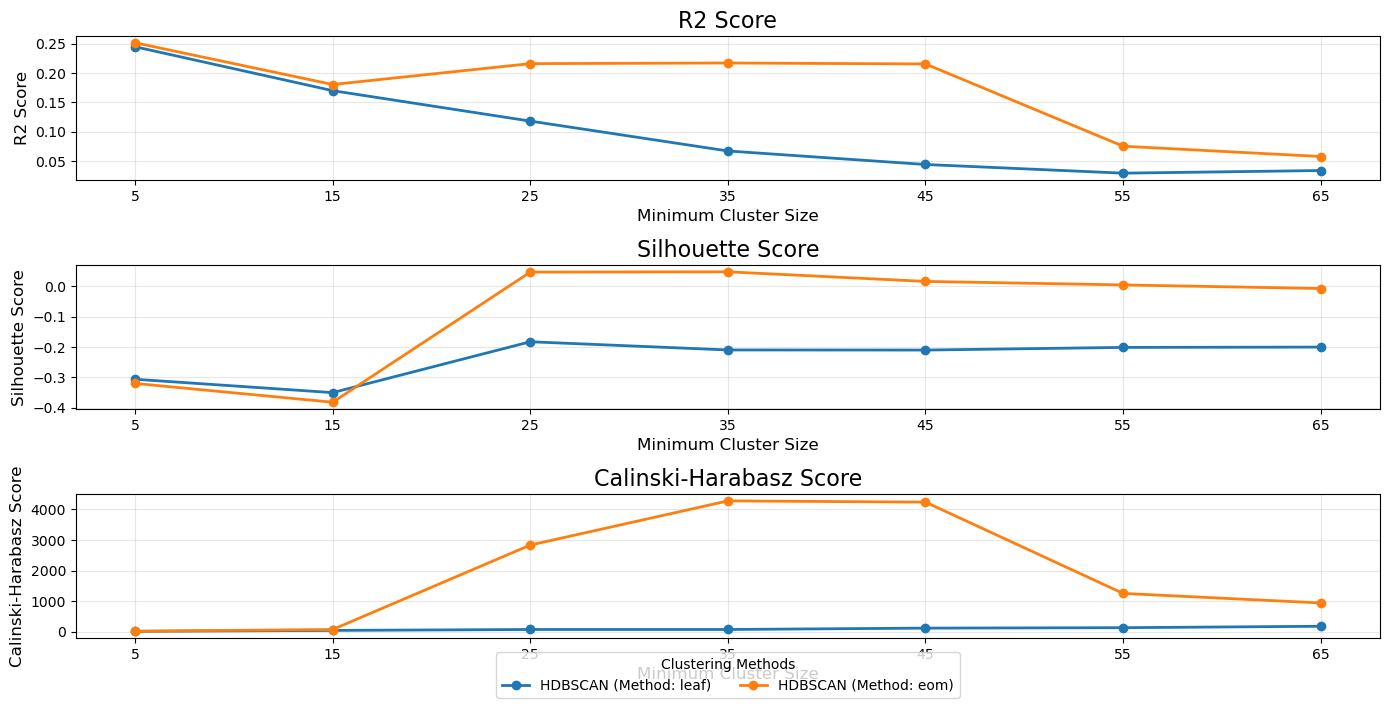

In [123]:
f.plot_evaluation_scores(hdb_results_df, path+'HDBScan_scores')

**Final model for HDBScan**

In [139]:
hdbscan = HDBSCAN(min_cluster_size = 45, 
                  cluster_selection_method = 'eom')

hdblabels = hdbscan.fit_predict(scaled_data)

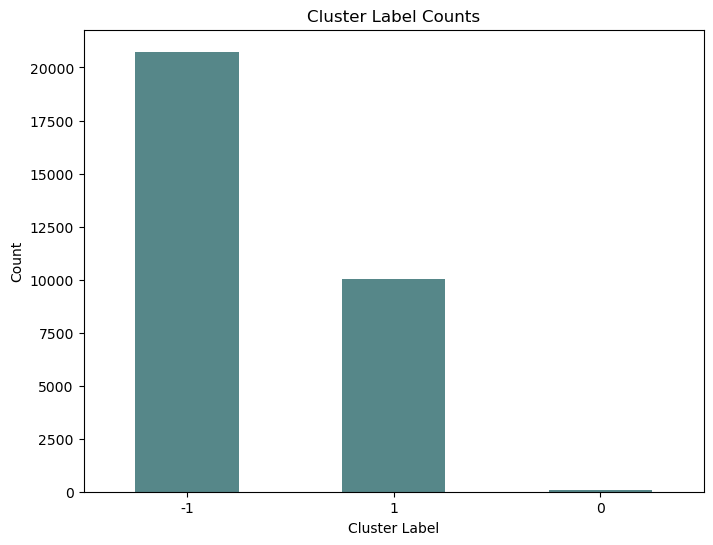

In [140]:
f.plot_counts(hdblabels)

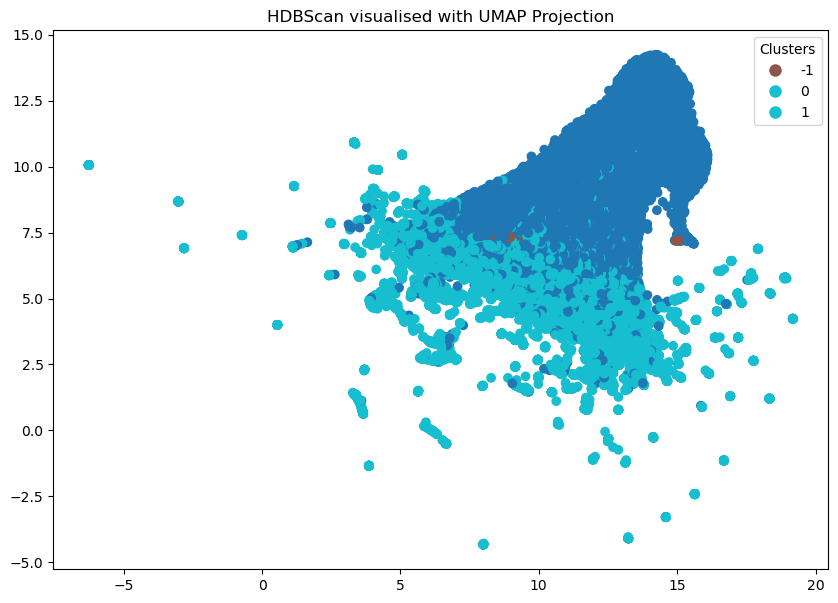

In [141]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = hdblabels,
                   technique = 'HDBScan visualised with UMAP')

## 2.5 Gaussian Mixture Model (GMM)

<a href="#top">Top &#129033;</a>

Use AIC and BIC to help choose ranges for n_components

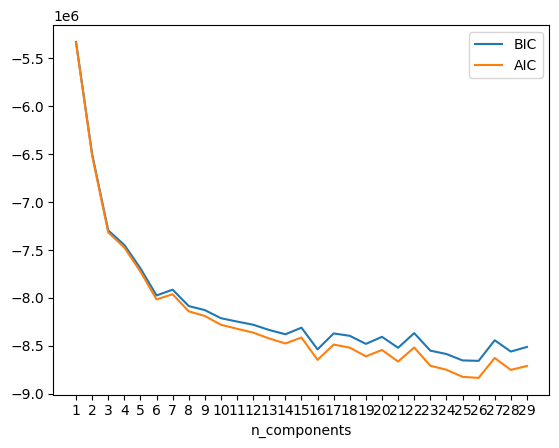

In [11]:
n_components = np.arange(1, 30)
models = [GaussianMixture(n, random_state=1).fit(scaled_data)
          for n in n_components]

bic_values = [m.bic(scaled_data) for m in models]
aic_values = [m.aic(scaled_data) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [35]:
gmm_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "gmm", "n_components": k, "covariance_type": 'full', 'init_params': 'kmeans'}
    for k in range(15, 20)  
] + [
    {"model_type": "gmm", "n_components": k, "covariance_type": 'tied', 'init_params': 'kmeans'}
    for k in range(15, 20)  
] + [
    {"model_type": "gmm", "n_components": k, "covariance_type": 'diag', 'init_params': 'kmeans'}
    for k in range(15, 20)  
] + [
    {"model_type": "gmm", "n_components": k, "covariance_type": 'spherical', 'init_params': 'kmeans'}
    for k in range(15, 20)  
]
# ] + [
#     {"model_type": "gmm", "n_components": k, "covariance_type": 'tied', 'init_params': 'k-means++'}
#     for k in range(15, 17)  
# ] + [
#     {"model_type": "gmm", "n_components": k, "covariance_type": 'spherical', 'init_params': 'k-means++'}
#     for k in range(15, 17)  
# ] 



# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    gmm_results.append(result)

# Convert results to DataFrame
gmm_results_df = pd.DataFrame(gmm_results)
gmm_results_df

,Model,n_components,covariance_type,init_params,R2,Silhouette,Calinski-Harabasz
0,gmm,15,full,kmeans,0.198812,-0.112910,546.543572
1,gmm,16,full,kmeans,0.210696,-0.087274,548.720314
2,gmm,17,full,kmeans,0.257772,-0.084961,669.257253
3,gmm,18,full,kmeans,0.221792,-0.104472,516.894672
4,gmm,19,full,kmeans,0.230677,-0.122496,513.582434
5,gmm,15,tied,kmeans,0.653617,0.124720,4156.071460
6,gmm,16,tied,kmeans,0.619703,0.137635,3349.650378
7,gmm,17,tied,kmeans,0.623848,0.112060,3196.028376
8,gmm,18,tied,kmeans,0.653880,0.109027,3426.284122
9,gmm,19,tied,kmeans,0.556363,0.050050,2148.057144


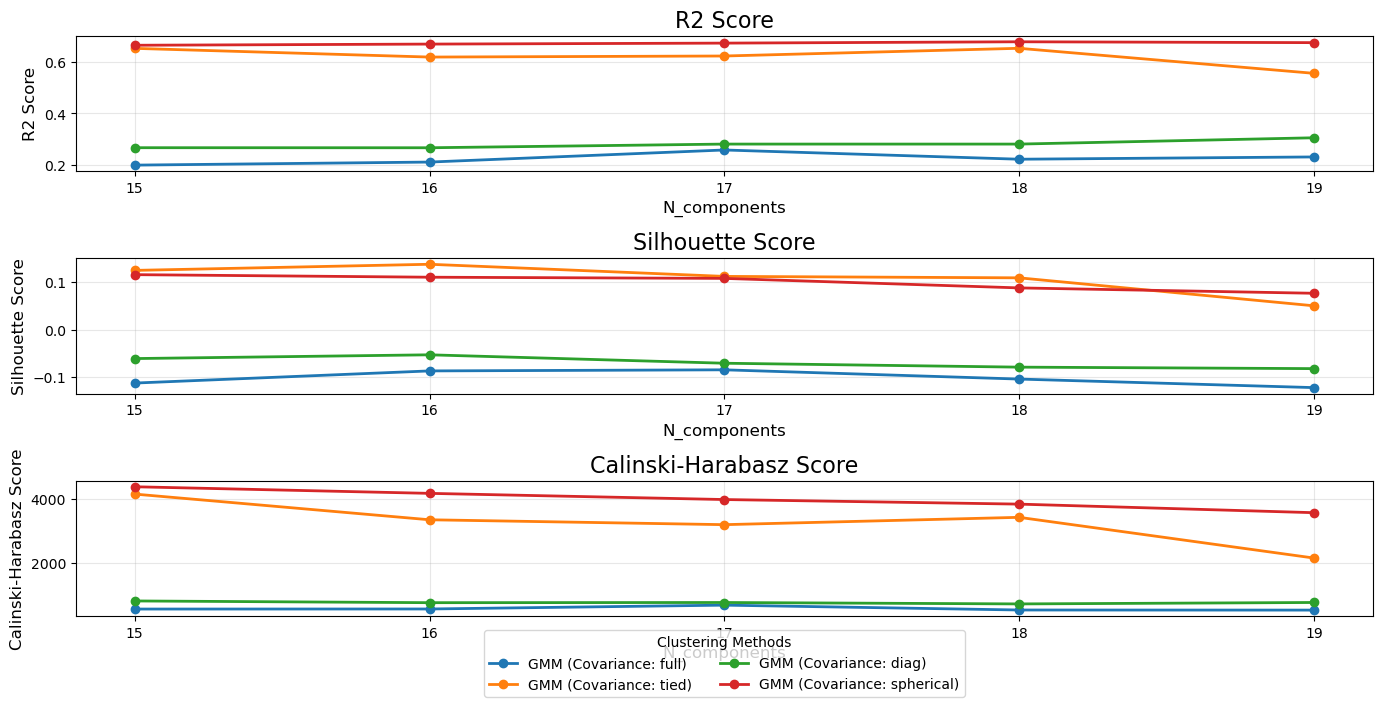

In [159]:
f.plot_evaluation_scores(gmm_results_df, path+'gmm')

**Final Model for GMM**

In [38]:
gmm = GaussianMixture(random_state = 1, covariance_type = 'tied',
                     n_components = 15)

gmm_labels = gmm.fit_predict(scaled_data)

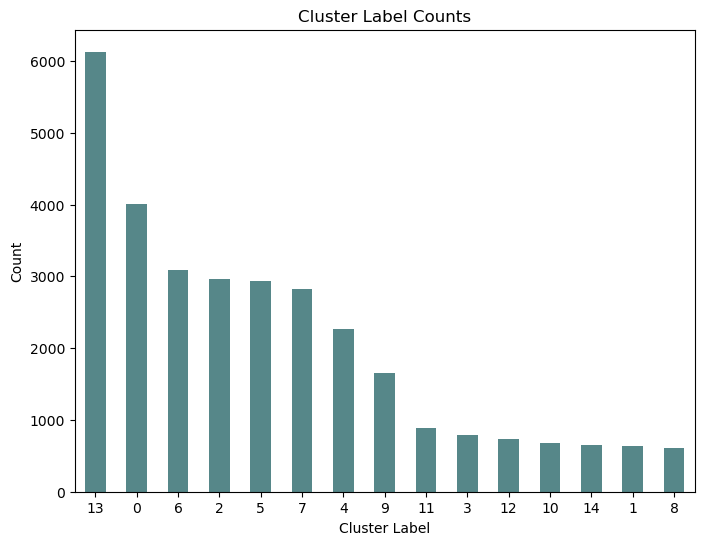

In [39]:
f.plot_counts(gmm_labels)

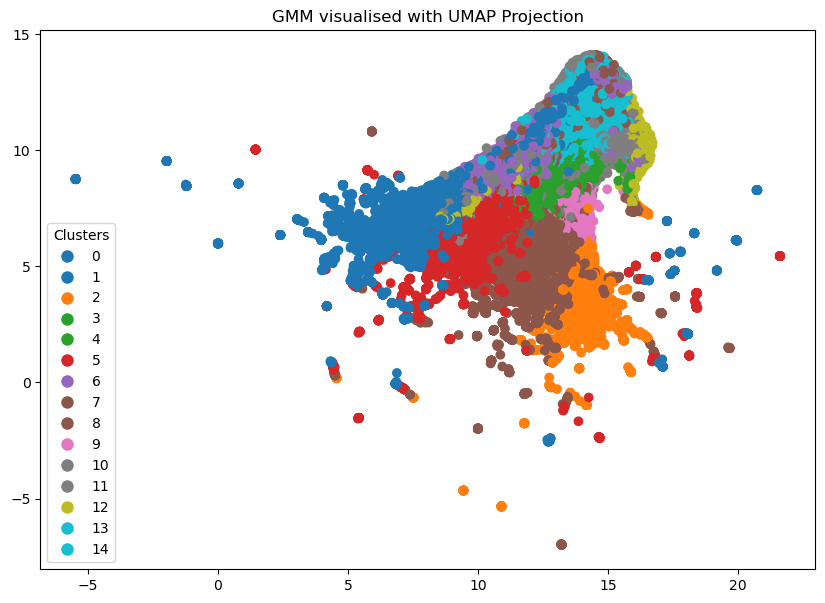

In [137]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = gmm_labels,
                   technique = 'GMM visualised with UMAP')

## 2.6 Self Organising Maps (SOM)

<a href="#top">Top &#129033;</a>

som requires we work with an array and not DF

In [47]:
scaled_data_array = scaled_data.to_numpy()

In [137]:
np.random.seed(42)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(scaled_data_array, i)
    q_errors.append(som.quantization_error(scaled_data_array))

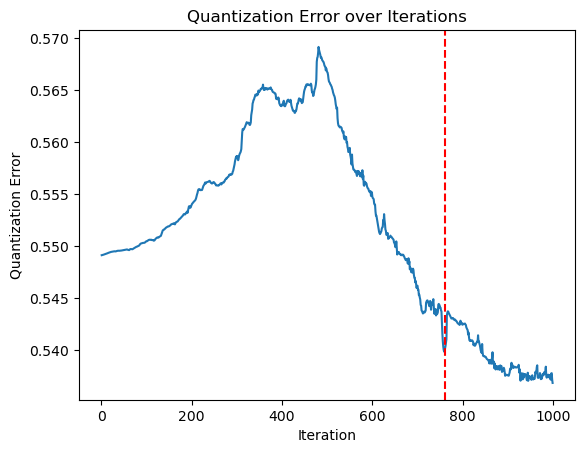

In [145]:
plt.plot(range(1, num_iterations), q_errors)
plt.title('Quantization Error over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Quantization Error')
plt.axvline(x=760, color='red', linestyle='--')
plt.show()

In [121]:
som_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "som", "x": 15, 'y': 15, 'input_len': len(scaled_data.columns),
     'sigma': 0.5, 'learning_rate': 1, 'num_iterations': k}
    for k in np.arange(700, 800, 10) 
] + [
    {"model_type": "som", "x": 15, 'y': 15, 'input_len': len(scaled_data.columns),
     'sigma': 0.5, 'learning_rate': 0.9, 'num_iterations': k}
    for k in np.arange(700, 800, 10) 
] + [
    {"model_type": "som", "x": 15, 'y': 15, 'input_len': len(scaled_data.columns),
     'sigma': 0.5, 'learning_rate': 0.8, 'num_iterations': k}
    for k in np.arange(700, 800, 10) 
]



# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data_array, feats=scaled_data.columns.tolist(), 
                                       **settings)
    som_results.append(result)

# Convert results to DataFrame
som_results_df = pd.DataFrame(som_results)
som_results_df

,Model,x,y,input_len,sigma,learning_rate,num_iterations,R2,Silhouette,Calinski-Harabasz
0,som,15,15,39,0.5,1.0,700,0.438594,0.018570,2190.177042
1,som,15,15,39,0.5,1.0,710,0.492389,0.109735,4273.871836
2,som,15,15,39,0.5,1.0,720,0.491584,0.034746,2710.642352
3,som,15,15,39,0.5,1.0,730,0.505519,0.063154,2866.034774
4,som,15,15,39,0.5,1.0,740,0.464335,0.072594,2970.369899
5,som,15,15,39,0.5,1.0,750,0.461608,-0.040290,2033.707971
6,som,15,15,39,0.5,1.0,760,0.482373,-0.003776,2210.450100
7,som,15,15,39,0.5,1.0,770,0.514713,0.129200,2725.564793
8,som,15,15,39,0.5,1.0,780,0.509543,0.122842,2669.748704
9,som,15,15,39,0.5,1.0,790,0.470099,0.062211,2104.306063


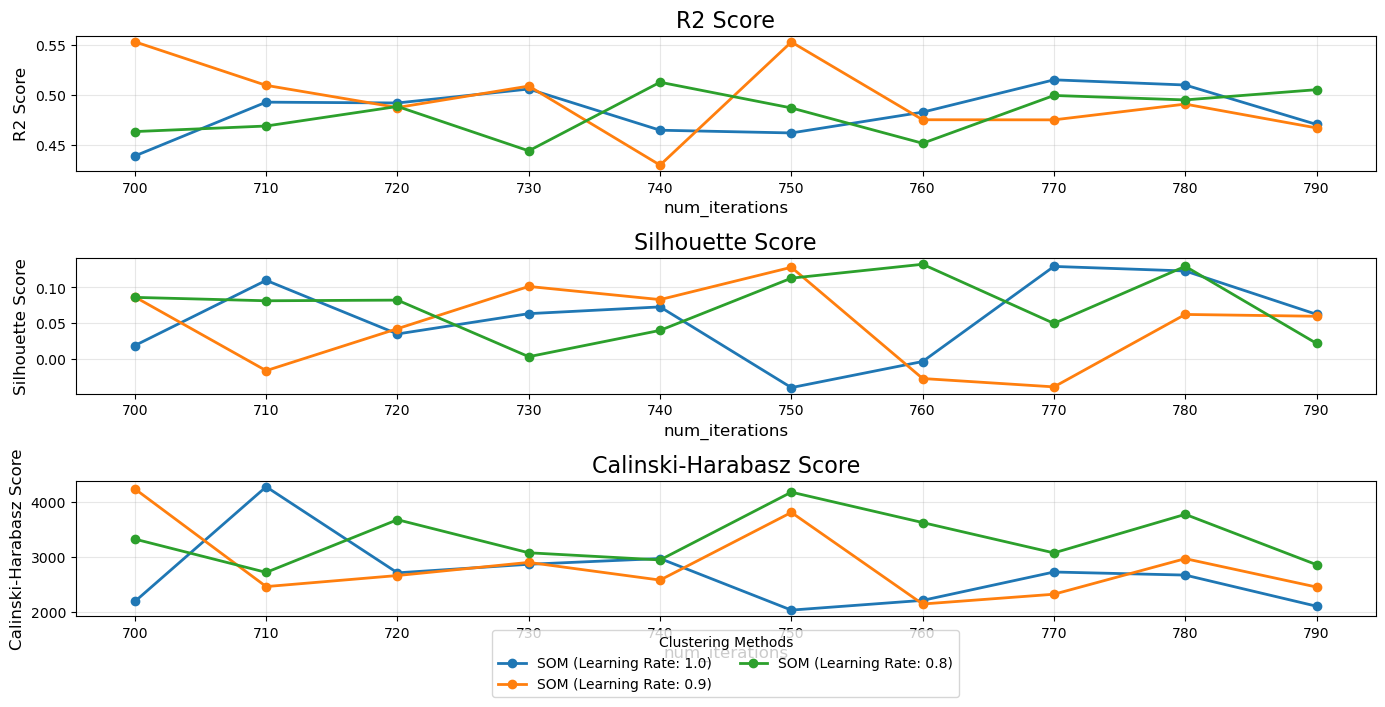

In [158]:
f.plot_evaluation_scores(som_results_df, path+'som')

**Final Model for SOM**

In [132]:
som = MiniSom(
    15, 
    15, 
    len(scaled_data.columns),
    sigma=0.5,
    neighborhood_function='gaussian',
    learning_rate = 0.9,
    random_seed=42
    )

som.train(scaled_data_array, 750)

# Get the SOM grid size (rows and columns)
weights = som.get_weights()
som_rows, som_cols, _ = weights.shape  # Extracting the grid dimensions

# Get the winning node (BMU) for each data point
som_labels = np.array([som.winner(x) for x in scaled_data_array])

# Convert the 2D grid positions to 1D labels
som_labels_1d = [x[0] * som_cols + x[1] for x in som_labels]

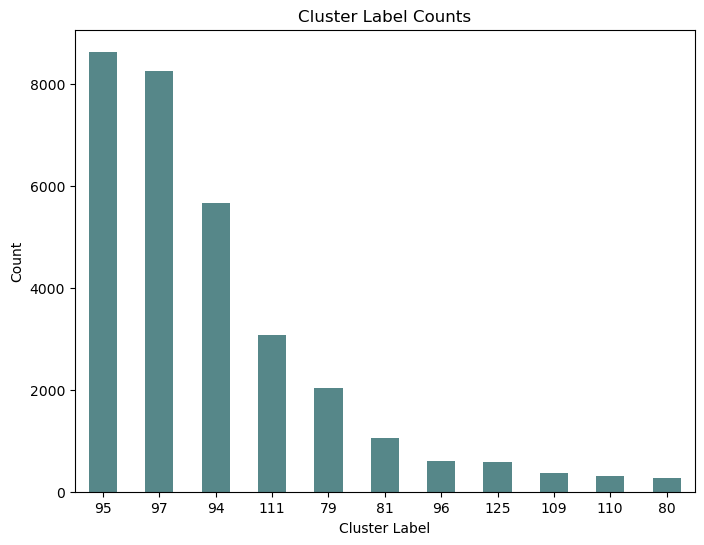

In [133]:
f.plot_counts(som_labels_1d)

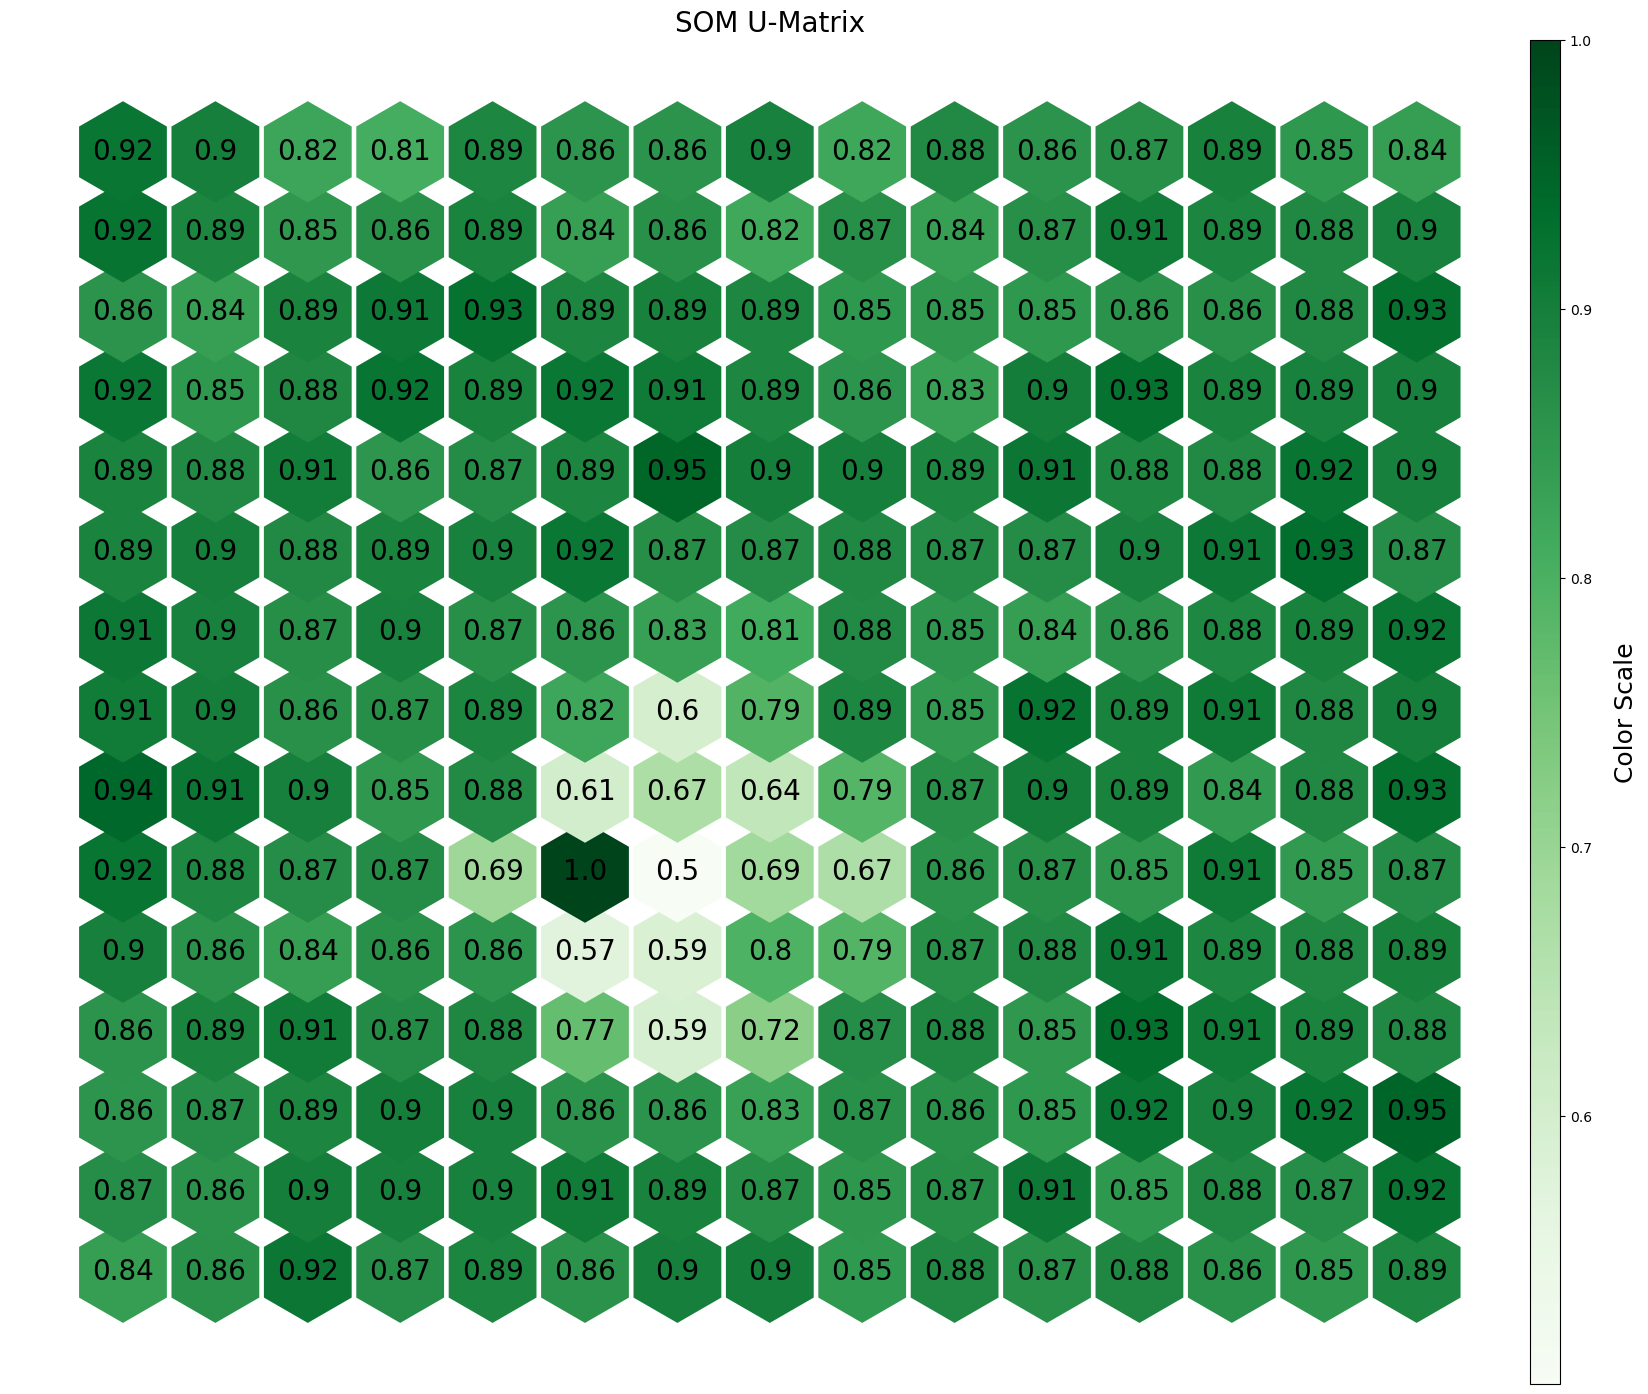

In [134]:
umatrix = som.distance_map(scaling='mean')

fig = f.plot_som_hexagons(som, umatrix, 
                          cmap=cm.Greens, 
                          title="SOM U-Matrix")
plt.show()

# 3. Model Combination

<a href="#top">Top &#129033;</a>

In [84]:
scaled_data_copy = scaled_data.copy()
scaled_data_array_copy = scaled_data_array.copy()

## 3.1 SOM + K-Means

<a href="#top">Top &#129033;</a>

Get Best Matching Units and convert their coordinater to features

In [87]:
som_labels = np.array([som.winner(x) for x in scaled_data_array_copy])
som_features = np.array([som.get_weights()[x[0], x[1]].flatten() for x in som_labels])

Apply K-Means in the SOM features

In [102]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(som_features)
    dispersion.append(kmeans.inertia_)
    

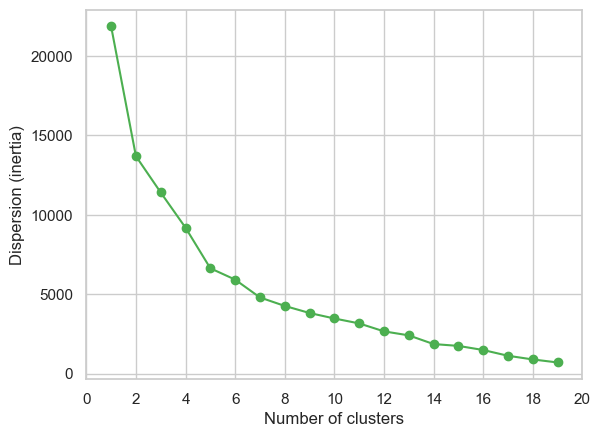

In [103]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
# plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [ ]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, 
                 n_init=15, 
                 random_state=1)

In [90]:
som_kmeans_labels = kmclust.fit_predict(som_features)

array([1, 2, 2, ..., 2, 2, 2], dtype=int32)

In [107]:
feats = scaled_data_copy.columns.to_list()

r2, silhouette, calinski_harabasz = f.cluster_evaluation(scaled_data_copy, 
                                                       feats, som_kmeans_labels)

print(f'R2 for SOM+K-Means: {r2}')
print(f'Silhouette Score for SOM+K-Means: {silhouette}')
print(f'Calinski Harabasz Index for SOM+K-Means: {calinski_harabasz}')

R2 for SOM+K-Means: [0.09227416]
Silhouette Score for SOM+K-Means: [-0.01010164]
Calinski Harabasz Index for SOM+K-Means: [1567.86382138]


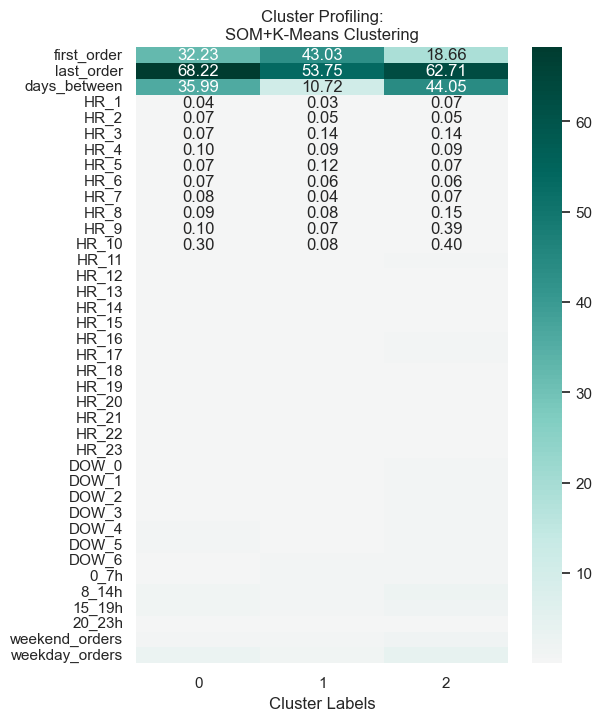

In [91]:
f.plot_cluster_profiling(temp_data, som_kmeans_labels, "SOM+K-Means")

# 4. Model Comparison

<a href="#top">Top &#129033;</a>

Export and Import Result Dataframes

In [145]:
# hr_results_df.to_csv('./result_dfs/temp_data/hr_results_df.csv')
# results_kmeans_df.to_csv('./result_dfs/temp_data/results_kmeans_df.csv')
# db_results_df.to_csv('./result_dfs/temp_data/db_results_df.csv')
# hdb_results_df.to_csv('./result_dfs/temp_data/hdb_results_df.csv')
# gmm_results_df.to_csv('./result_dfs/temp_data/gmm_results_df.csv')
# som_results_df.to_csv('./result_dfs/temp_data/som_results_df.csv')

In [146]:
hr_results_df = pd.read_csv('./result_dfs/temp_data/hr_results_df.csv')
results_kmeans_df = pd.read_csv('./result_dfs/temp_data/results_kmeans_df.csv')
db_results_df = pd.read_csv('./result_dfs/temp_data/db_results_df.csv')
hdb_results_df = pd.read_csv('./result_dfs/temp_data/hdb_results_df.csv')
gmm_results_df = pd.read_csv('./result_dfs/temp_data/gmm_results_df.csv')
som_results_df = pd.read_csv('./result_dfs/temp_data/som_results_df.csv')

Join all Dataframes

In [147]:
dfs = [hr_results_df, results_kmeans_df, db_results_df, 
       hdb_results_df, gmm_results_df, som_results_df]
results_df = pd.concat(dfs)
results_df.reset_index()
results_df.drop('Unnamed: 0', axis = 1, inplace = True)

Create a new Dataframe with the Model name, Metric Name and corresponding value.

In [148]:
def create_configuration(row):
    if not pd.isna(row.get('n_clusters', None)):
        return f"{row['Model']} (n_clusters={row['n_clusters']})"
    elif not pd.isna(row.get('eps', None)):
        return f"{row['Model']} (eps={row['eps']})"
    elif not pd.isna(row.get('min_cluster_size', None)):
        return f"{row['Model']} (min_cluster_size={row['min_cluster_size']})"
    elif not pd.isna(row.get('n_components', None)):  # For GMM
        return f"{row['Model']} (n_components={row['n_components']})"
    elif not pd.isna(row.get('num_iterations', None)):  # For SOM
        return f"{row['Model']} (num_iterations={row['num_iterations']})"
    else:
        return row['Model']

In [149]:
results_df['Configuration'] = results_df.apply(create_configuration, axis=1)
metrics = ['R2', 'Silhouette', 'Calinski-Harabasz']
df_melted = results_df.melt(
    id_vars=['Configuration'],  
    value_vars=metrics,
    var_name='Metric',
    value_name='Value'
)

df_melted

,Configuration,Metric,Value
0,hierarchical (n_clusters=2.0),R2,0.321427
1,hierarchical (n_clusters=3.0),R2,0.448215
2,hierarchical (n_clusters=4.0),R2,0.509345
3,hierarchical (n_clusters=5.0),R2,0.545943
4,hierarchical (n_clusters=6.0),R2,0.571992
...,...,...,...
310,som (num_iterations=750.0),Calinski-Harabasz,4175.962119
311,som (num_iterations=760.0),Calinski-Harabasz,3623.582350
312,som (num_iterations=770.0),Calinski-Harabasz,3072.454410
313,som (num_iterations=780.0),Calinski-Harabasz,3773.153558


Plot all models and choose the best

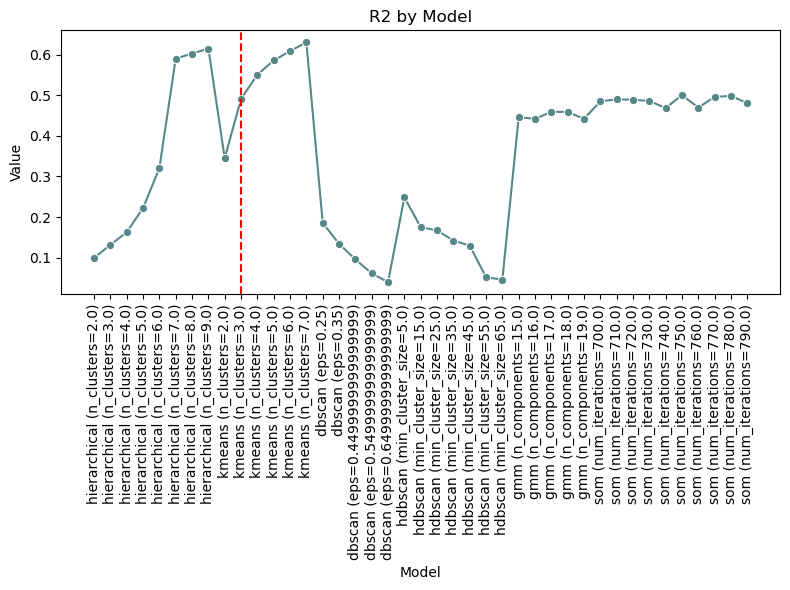

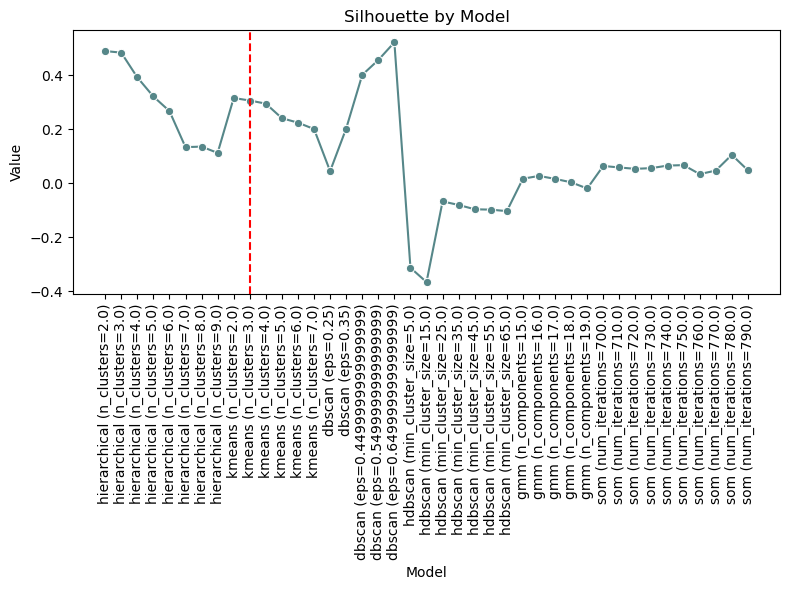

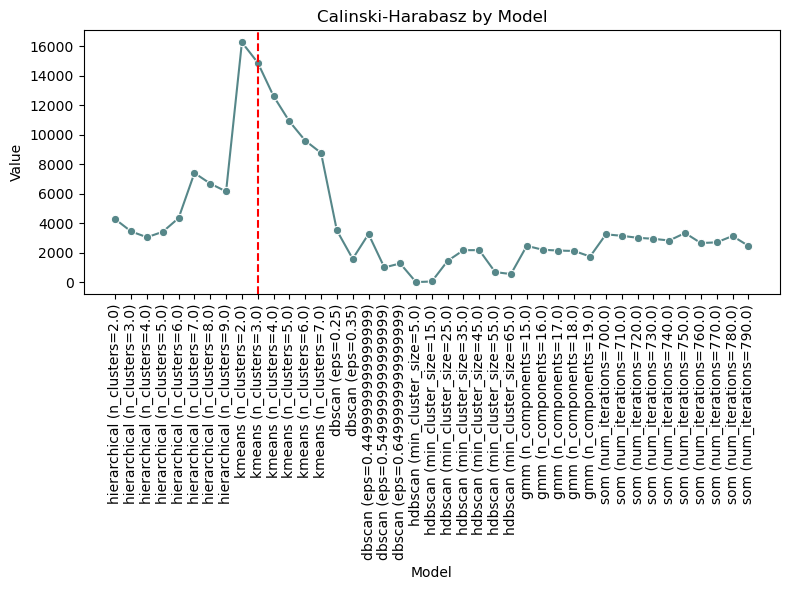

In [156]:
metrics = ['R2', 'Silhouette', 'Calinski-Harabasz']
model_for_line = 'kmeans (n_clusters=3.0)'  
f.model_comparison(df_melted, metrics, model_for_line)

**Final Solution**

In [15]:
temp_data['temp_data_labels'] = km_labels

,first_order,last_order,days_between,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h,weekend_orders,weekday_orders,temp_data_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,2,0,0
5d272b9dcb,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0,2,0,0
f6d1b2ba63,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0,2,0,0
180c632ed8,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,1,1,0
4eb37a6705,0,2,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
f6b6709018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
f74ad8ce3f,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0


In [17]:
temp_data.to_csv('./data/labels/temp_data.csv')